In [48]:

from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import time

In [49]:

url = "https://github.com/Tuan3198263/CT294/raw/main/online_shoppers_intention_scale.csv"
df = pd.read_csv(url)
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,0.001418,0.000000,1.00,1.00,0.0,0.0,0.0,0.000000,0.000000,0.000,0.000000,0.0,0.0,False
1,0.0,0.0,0.0,0.0,0.002837,0.001000,0.00,0.50,0.0,0.0,0.0,0.142857,0.083333,0.000,0.052632,0.0,0.0,False
2,0.0,0.0,0.0,0.0,0.001418,0.000000,1.00,1.00,0.0,0.0,0.0,0.428571,0.000000,1.000,0.105263,0.0,0.0,False
3,0.0,0.0,0.0,0.0,0.002837,0.000042,0.25,0.70,0.0,0.0,0.0,0.285714,0.083333,0.125,0.157895,0.0,0.0,False
4,0.0,0.0,0.0,0.0,0.014184,0.009809,0.10,0.25,0.0,0.0,0.0,0.285714,0.166667,0.000,0.157895,0.0,1.0,False


In [ ]:
# Đếm số lượng dòng bị trùng lặp
df.duplicated().sum()

125

In [50]:
# Xóa các dòng bị trùng
df.drop_duplicates(inplace=True)

In [51]:
X = df.drop('Revenue', axis=1)  # Trích xuất tất cả các cột ngoại trừ cột 'target'
y = df['Revenue']


In [52]:

# Chuyển đổi các cột đặc trưng (X) thành mảng NumPy
X = X.values


# Chuyển đổi cột nhãn (y) thành mảng NumPy
y = y.values

In [53]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Sử dụng hàm trên để in ra confusion matrix
def plot_confusion_matrix(Y_test, Y_pred):
    cm = confusion_matrix(Y_test, Y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=['Not Revenue', 'Revenue'],
                yticklabels=['Not Revenue', 'Revenue'])
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()



# HOLD_OUT

In [ ]:
#knn
import statistics
from sklearn.neighbors import KNeighborsClassifier
avg_acc = []
avg_prec = []
avg_rec = []
avg_f1 = []
train_times = []

  # Thực hiện vòng lặp
for _ in range(10):  # Thực hiện 10 lần lặp

    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=1/3, random_state=None, shuffle = True)

    # Đếm số lượng giá trị True và False trong mảng NumPy
    num_true = np.sum(Y_test)
    num_false = len(Y_test) - num_true

    print("Số lượng True:", num_true)
    print("Số lượng False:", num_false)

      # Đo thời gian bắt đầu huấn luyện
    start_train_time = time.time()

      # Tạo và huấn luyện mô hình KNN
    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(X_train, Y_train)

      # Đo thời gian kết thúc huấn luyện và tính toán thời gian huấn luyện
    end_train_time = time.time()
    train_time = end_train_time - start_train_time
    train_times.append(train_time)



      # Dự đoán trên tập kiểm tra
    Y_Pred = model.predict(X_test)

    plot_confusion_matrix(Y_test,Y_Pred)


      # Tính toán các chỉ số đánh giá và thêm vào danh sách
    avg_acc.append(accuracy_score(Y_test, Y_Pred ))
    avg_prec.append(precision_score(Y_test, Y_Pred, average='weighted'))
    avg_rec.append(recall_score(Y_test, Y_Pred, average='weighted'))
    avg_f1.append(f1_score(Y_test, Y_Pred, average='weighted'))
    print("F1-Socre của model ", _, ":", f1_score(Y_test, Y_Pred, average='weighted'))
    print("\n")


  # Tính trung bình của các chỉ số
acc = statistics.mean(avg_acc)
prec = statistics.mean(avg_prec)
rec = statistics.mean(avg_rec)
f1 = statistics.mean(avg_f1)
avg_train_time = statistics.mean(train_times)


  # In kết quả
print("Accuracy: ", acc)
print("Precision: ", prec)
print("Recall: ", rec)
print("F1_Score: ", f1)
print("Train times: ", avg_train_time)

max_index = avg_f1.index(max(avg_f1))
max_value = max(avg_f1)
print("Highest F1 score:", max_value, "from model", max_index)




KNN chạy tương đối tệ với tập dữ liệu mất cân bằng, nó nghiêng về dư đoán lớp đa số

In [ ]:
#Bayesian
import statistics
from sklearn.naive_bayes import GaussianNB
avg_acc = []
avg_prec = []
avg_rec = []
avg_f1 = []
train_times = []


# Thực hiện vòng lặp
for _ in range(10):  # Thực hiện 10 lần lặp

    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=1/3, random_state=None)

     # Đếm số lượng giá trị True và False trong mảng NumPy
    num_true = np.sum(Y_test)
    num_false = len(Y_test) - num_true

    print("Số lượng True:", num_true)
    print("Số lượng False:", num_false)


    # Đo thời gian bắt đầu huấn luyện
    start_train_time = time.time()

    # Tạo và huấn luyện mô hình Naive Bayes
    model = GaussianNB()
    model.fit(X_train, Y_train)

    # Đo thời gian kết thúc huấn luyện và tính toán thời gian huấn luyện
    end_train_time = time.time()
    train_time = end_train_time - start_train_time
    train_times.append(train_time)



    # Dự đoán trên tập kiểm tra
    Y_Pred = model.predict(X_test)

    plot_confusion_matrix(Y_test,Y_Pred)


    # Tính toán các chỉ số đánh giá và thêm vào danh sách
    avg_acc.append(accuracy_score(Y_test, Y_Pred))
    avg_prec.append(precision_score(Y_test, Y_Pred, average='weighted'))
    avg_rec.append(recall_score(Y_test, Y_Pred, average='weighted'))
    avg_f1.append(f1_score(Y_test, Y_Pred, average='weighted'))
    print("F1-Socre của model ", _, ":", f1_score(Y_test, Y_Pred, average='weighted'))
    print("\n")
# Tính trung bình của các chỉ số
acc = statistics.mean(avg_acc)
prec = statistics.mean(avg_prec)
rec = statistics.mean(avg_rec)
f1 = statistics.mean(avg_f1)
avg_train_time = statistics.mean(train_times)


# In kết quả
print("Accuracy: ", acc)
print("Precision: ", prec)
print("Recall: ", rec)
print("F1_Score: ", f1)
print("Train times: ", avg_train_time)
max_index = avg_f1.index(max(avg_f1))
max_value = max(avg_f1)
print("Highest F1 score:", max_value, "from model", max_index)



# Bayesian dự đoán số người mua hàng thực sự mua hàng tốt hơn KNN, tuy nhiên nó cũng dự đoán sai nhiều về số người k thực sự mua hàng

Số lượng True: 638
Số lượng False: 3431


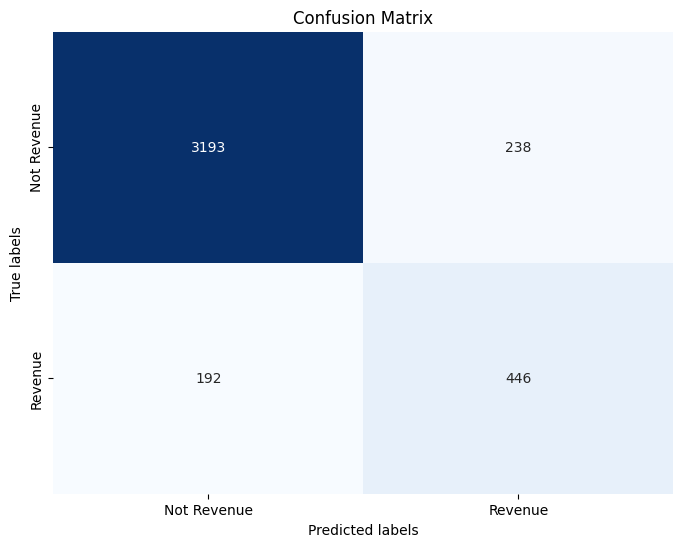

F1-Socre của model  0 : 0.895804888573634


Số lượng True: 632
Số lượng False: 3437


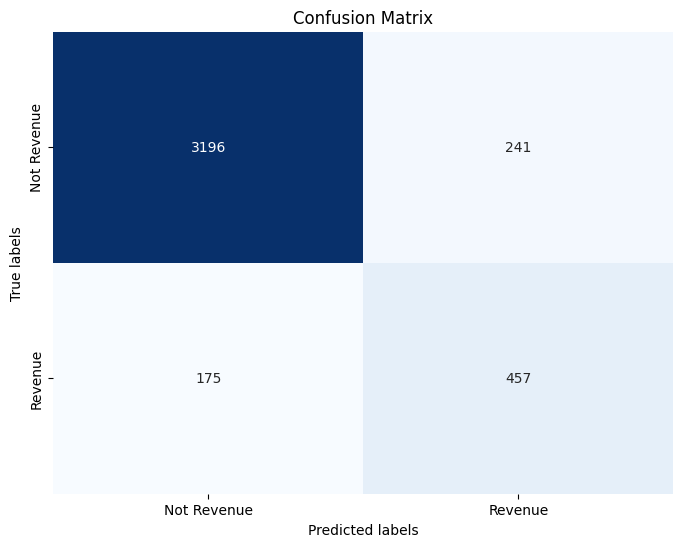

F1-Socre của model  1 : 0.8998047071215128


Số lượng True: 643
Số lượng False: 3426


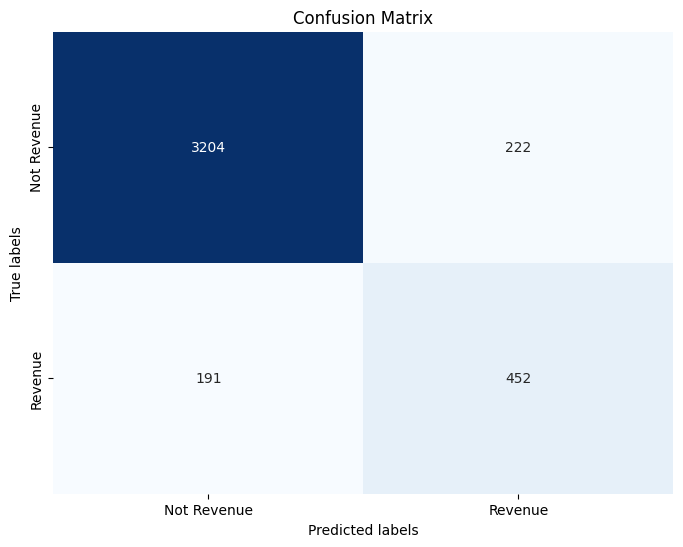

F1-Socre của model  2 : 0.89946477498929


Số lượng True: 644
Số lượng False: 3425


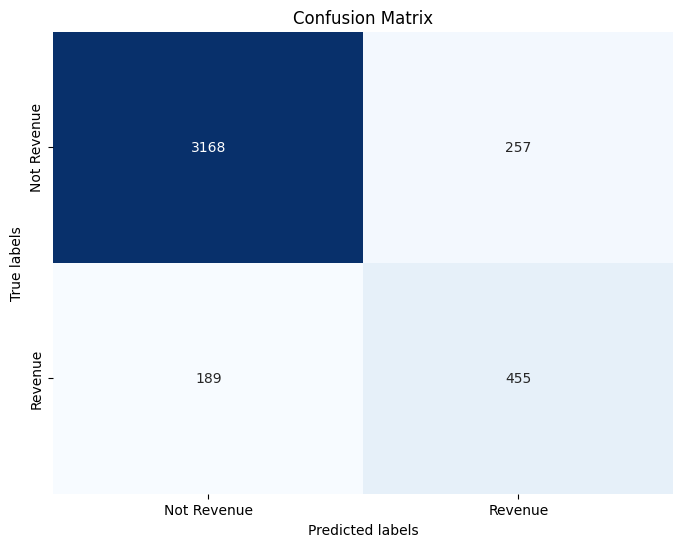

F1-Socre của model  3 : 0.892589572928822


Số lượng True: 675
Số lượng False: 3394


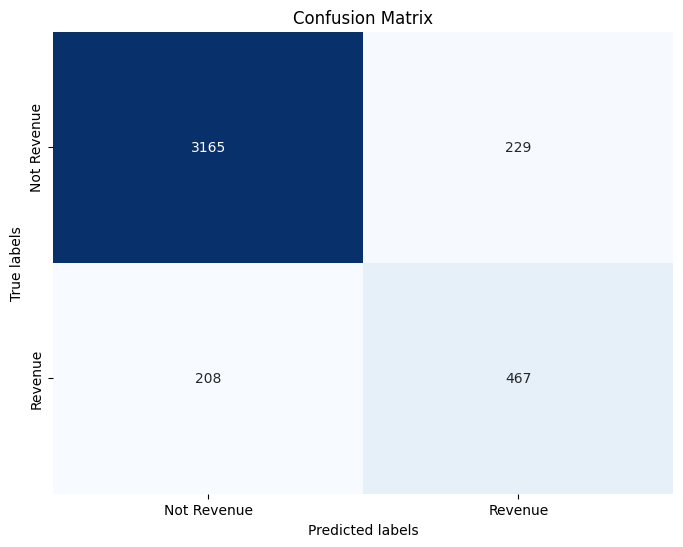

F1-Socre của model  4 : 0.8932584804835754


Số lượng True: 639
Số lượng False: 3430


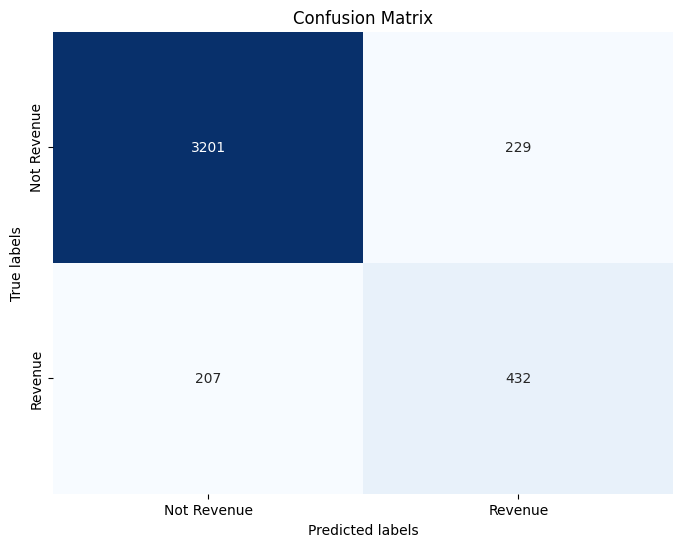

F1-Socre của model  5 : 0.8935826630863294


Số lượng True: 601
Số lượng False: 3468


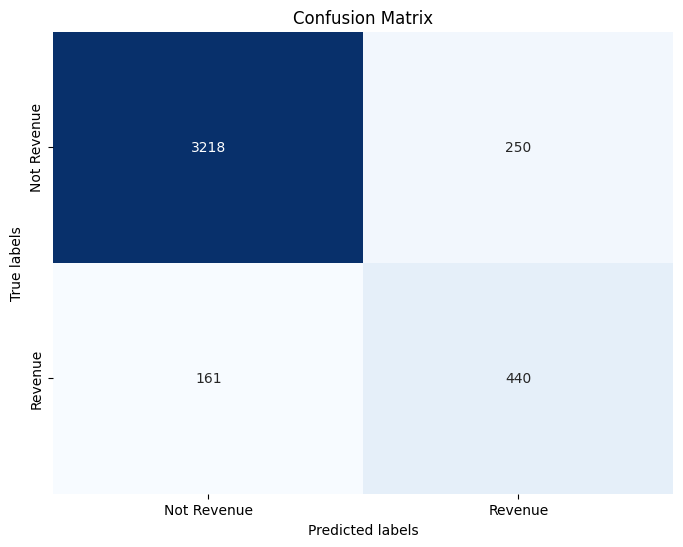

F1-Socre của model  6 : 0.9018175854040391


Số lượng True: 638
Số lượng False: 3431


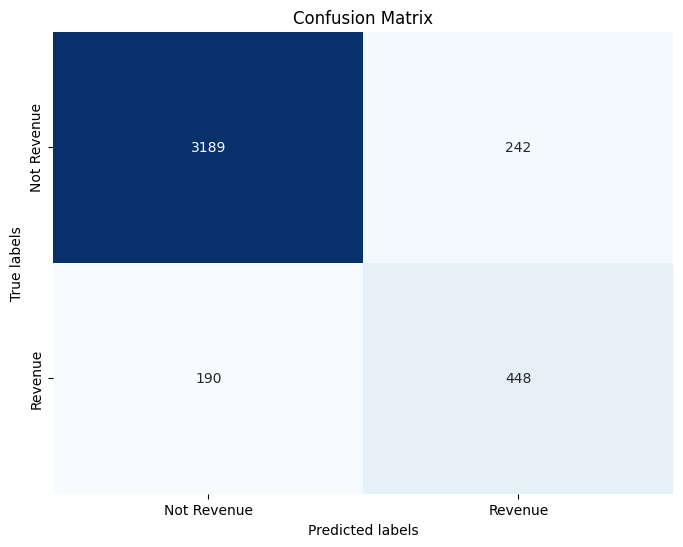

F1-Socre của model  7 : 0.8955046675149306


Số lượng True: 632
Số lượng False: 3437


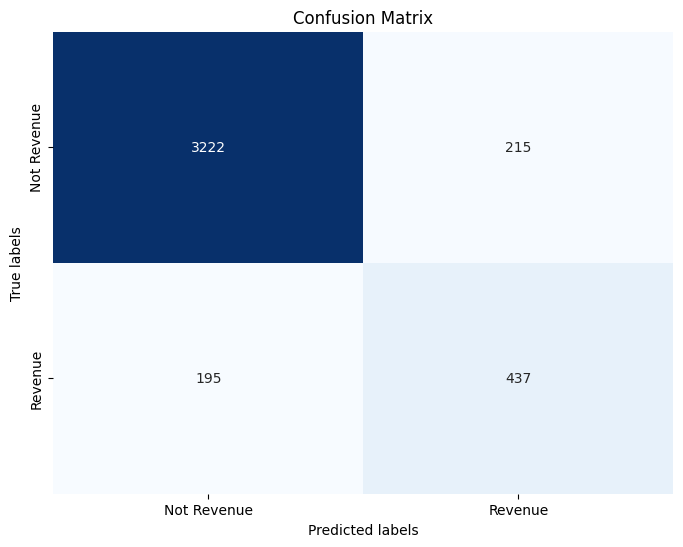

F1-Socre của model  8 : 0.8998758799655882


Số lượng True: 634
Số lượng False: 3435


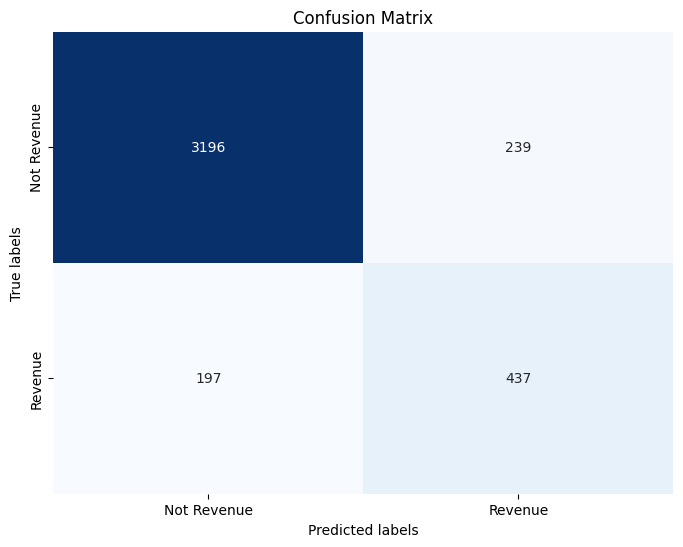

F1-Socre của model  9 : 0.8942365111682741


Accuracy:  0.8951339395428852
Precision:  0.8984523315467091
Recall:  0.8951339395428852
F1_Score:  0.8965939731235996
Train times:  8.148472499847411
Highest F1 score: 0.9018175854040391 from model 6


In [54]:

#Bagging_
import random
import statistics

# Tạo danh sách để lưu trữ kết quả
avg_acc = []
avg_prec = []
avg_rec = []
avg_f1 = []
train_times = []


# Thực hiện vòng lặp
for _ in range(10):  # Thực hiện 10 lần lặp

    X_train, X_test, Y_train, Y_test = train_test_split(X, y , test_size=1/3, random_state=None, shuffle = True)


     # Đếm số lượng giá trị True và False trong mảng NumPy
    num_true = np.sum(Y_test)
    num_false = len(Y_test) - num_true

    print("Số lượng True:", num_true)
    print("Số lượng False:", num_false)


    # Đo thời gian bắt đầu huấn luyện
    start_train_time = time.time()


    # Tạo và huấn luyện mô hình Bagging
    model = BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=50, criterion='entropy',
                                                               min_samples_split=4, min_samples_leaf=4, class_weight='balanced'), n_estimators=200, #bootstrap_features=True,
                                random_state=42)
    model.fit(X_train, Y_train)


     # Đo thời gian kết thúc huấn luyện và tính toán thời gian huấn luyện
    end_train_time = time.time()
    train_time = end_train_time - start_train_time
    train_times.append(train_time)

    #du doan tren tap kiem tra
    Y_Pred = model.predict(X_test)

    plot_confusion_matrix(Y_test,Y_Pred)


    # Tính toán các chỉ số đánh giá và thêm vào danh sách
    avg_acc.append(accuracy_score(Y_test, Y_Pred))
    avg_prec.append(precision_score(Y_test, Y_Pred, average='weighted'))
    avg_rec.append(recall_score(Y_test, Y_Pred, average='weighted'))
    avg_f1.append(f1_score(Y_test, Y_Pred, average='weighted'))
    print("F1-Socre của model ", _, ":", f1_score(Y_test, Y_Pred, average='weighted'))
    print("\n")

# Tính trung bình của các chỉ số
acc = statistics.mean(avg_acc)
prec = statistics.mean(avg_prec)
rec = statistics.mean(avg_rec)
f1 = statistics.mean(avg_f1)
avg_train_time = statistics.mean(train_times)


# In kết quả
print("Accuracy: ", acc)
print("Precision: ", prec)
print("Recall: ", rec)
print("F1_Score: ", f1)
print("Train times: ", avg_train_time)
max_index = avg_f1.index(max(avg_f1))
max_value = max(avg_f1)
print("Highest F1 score:", max_value, "from model", max_index)


Bagging dự đoán khá tốt về tập thiểu số (true) trong khi tâp đa số k bị lệch nhiều như bayesian


Số lượng True: 642
Số lượng False: 3427


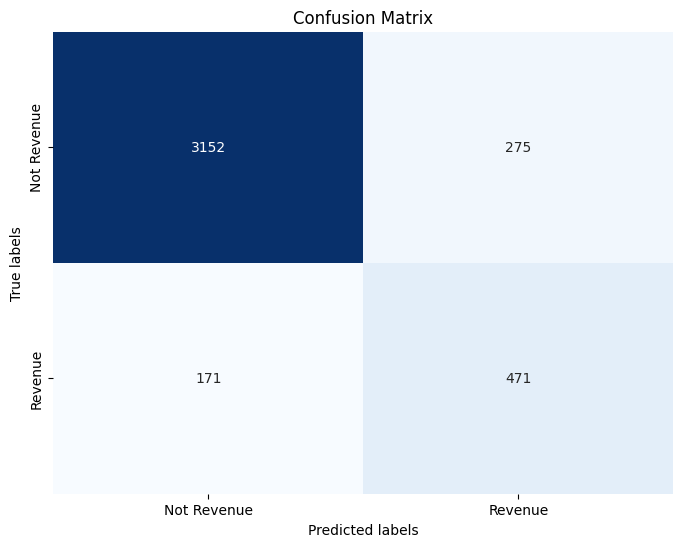

F1-Socre của model  0 : 0.8936527603503877


Số lượng True: 619
Số lượng False: 3450


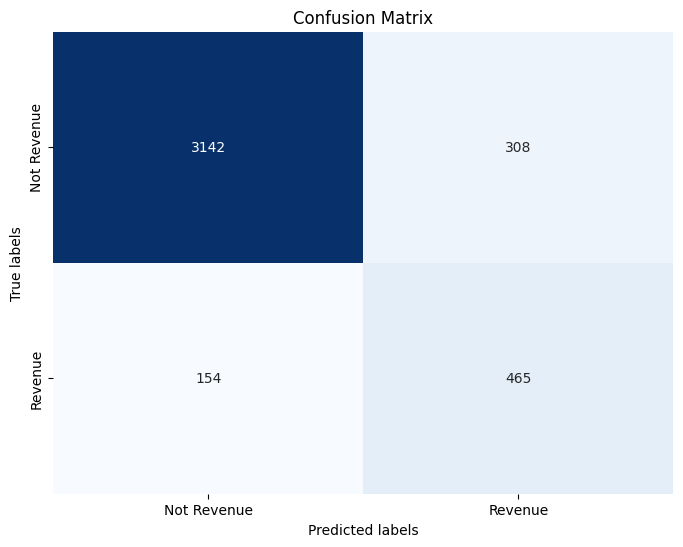

F1-Socre của model  1 : 0.8914432753290897


Số lượng True: 639
Số lượng False: 3430


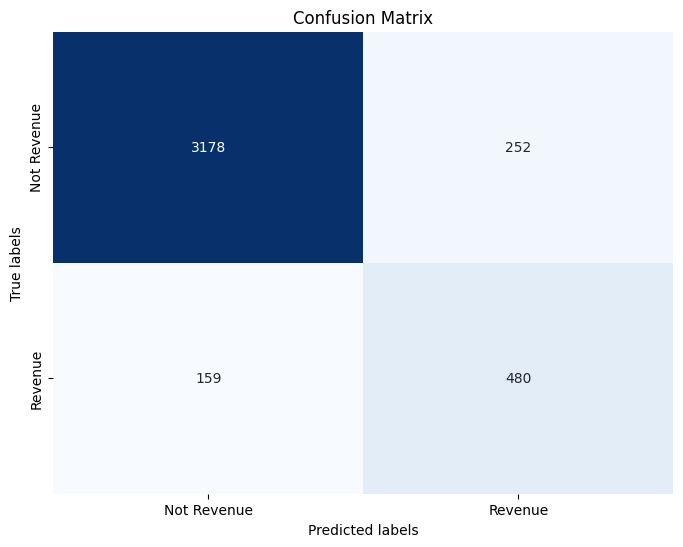

F1-Socre của model  2 : 0.901724159366809


Số lượng True: 627
Số lượng False: 3442


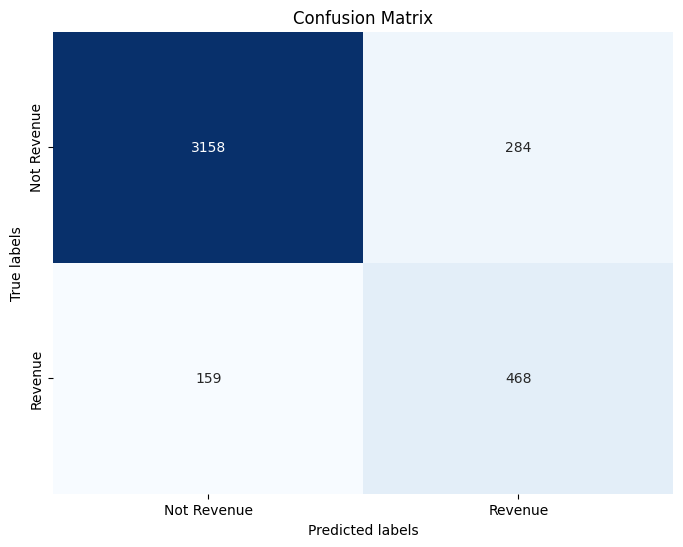

F1-Socre của model  3 : 0.8950556807671084


Số lượng True: 652
Số lượng False: 3417


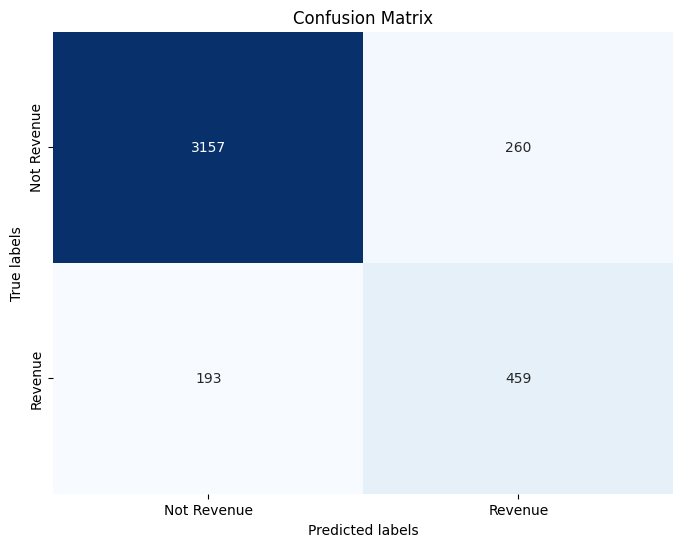

F1-Socre của model  4 : 0.8908396051935387


Số lượng True: 655
Số lượng False: 3414


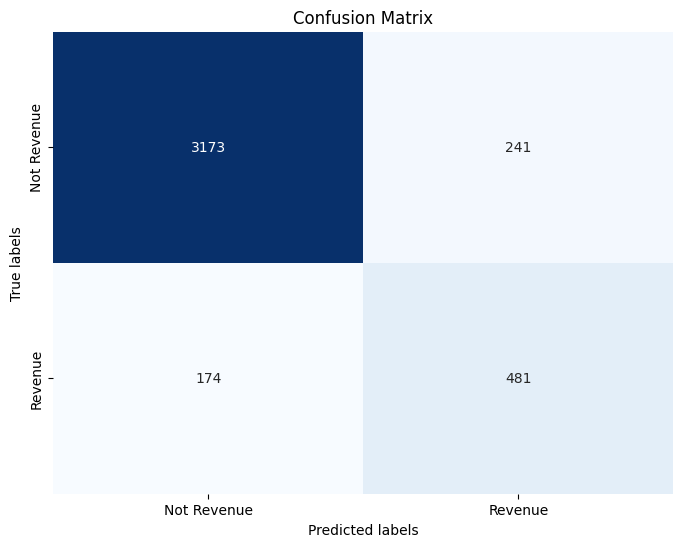

F1-Socre của model  5 : 0.8999852408497547


Số lượng True: 677
Số lượng False: 3392


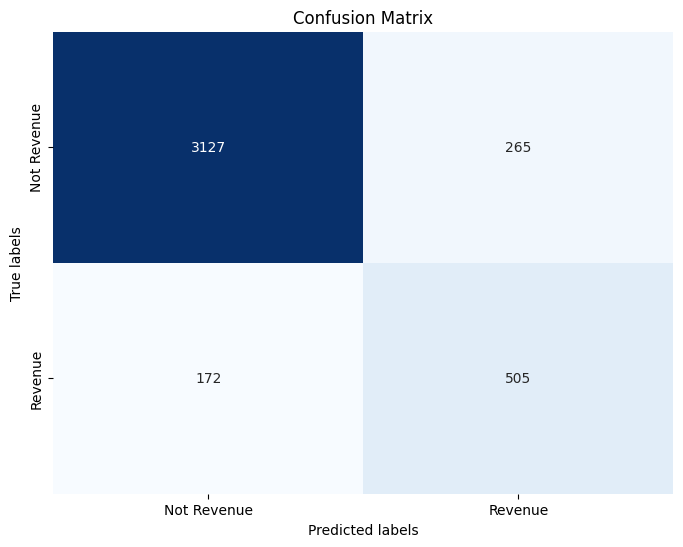

F1-Socre của model  6 : 0.8953074963937494


Số lượng True: 617
Số lượng False: 3452


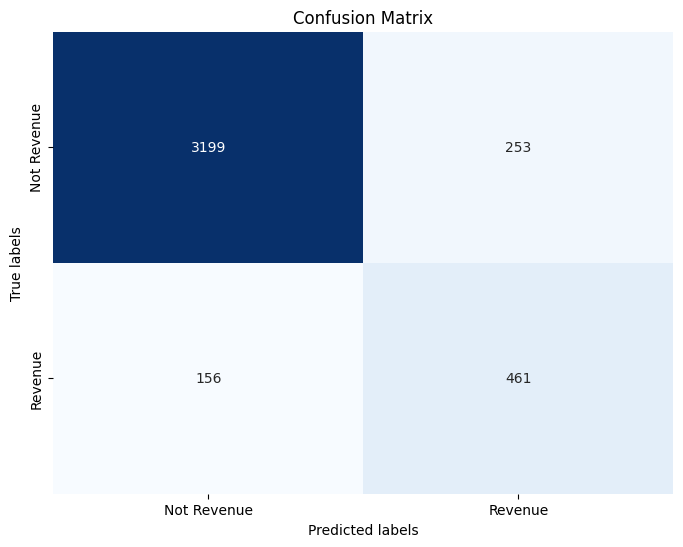

F1-Socre của model  7 : 0.9024304063744


Số lượng True: 634
Số lượng False: 3435


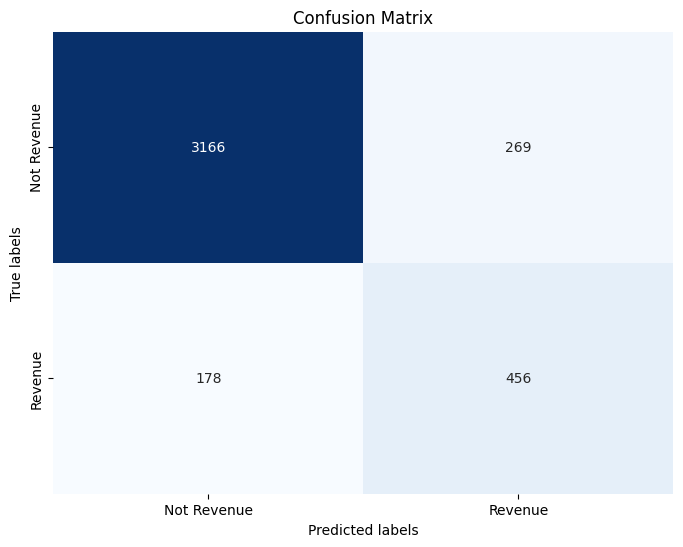

F1-Socre của model  8 : 0.8930856629129725


Số lượng True: 657
Số lượng False: 3412


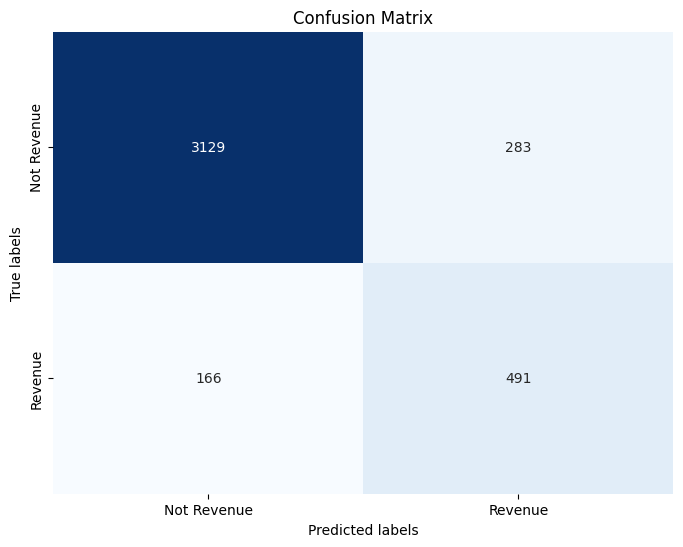

F1-Socre của model  9 : 0.8932020310678315


Accuracy:  0.8925534529368395
Precision:  0.9003692575431186
Recall:  0.8925534529368395
F1_Score:  0.8956726318605641
Train times:  7.306312400102615
Highest F1 score: 0.9024304063744 from model 7


In [ ]:
#Random Forest

import random
import statistics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Tạo danh sách để lưu trữ kết quả
avg_acc = []
avg_prec = []
avg_rec = []
avg_f1 = []

# Thực hiện vòng lặp
for _ in range(10):  # Thực hiện 10 lần lặp
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=1/3, random_state=None, shuffle = True)

      # Đếm số lượng giá trị True và False trong mảng NumPy
    num_true = np.sum(Y_test)
    num_false = len(Y_test) - num_true

    print("Số lượng True:", num_true)
    print("Số lượng False:", num_false)

    # Đo thời gian bắt đầu huấn luyện
    start_train_time = time.time()

    # Tạo và huấn luyện mô hình Random Forest
    model = RandomForestClassifier(n_estimators=200,criterion='entropy', max_depth=50, min_samples_leaf=4, min_samples_split=4,class_weight='balanced', random_state=42)
    model.fit(X_train, Y_train)

      # Đo thời gian kết thúc huấn luyện và tính toán thời gian huấn luyện
    end_train_time = time.time()
    train_time = end_train_time - start_train_time
    train_times.append(train_time)


    Y_Pred = model.predict(X_test)

    plot_confusion_matrix(Y_test,Y_Pred)

    # Tính toán các chỉ số đánh giá và thêm vào danh sách
    avg_acc.append(accuracy_score(Y_test, Y_Pred))
    avg_prec.append(precision_score(Y_test, Y_Pred, average='weighted'))
    avg_rec.append(recall_score(Y_test, Y_Pred, average='weighted'))
    avg_f1.append(f1_score(Y_test, Y_Pred, average='weighted'))
    print("F1-Socre của model ", _, ":", f1_score(Y_test, Y_Pred, average='weighted'))
    print("\n")

# Tính trung bình của các chỉ số
acc = statistics.mean(avg_acc)
prec = statistics.mean(avg_prec)
rec = statistics.mean(avg_rec)
f1 = statistics.mean(avg_f1)
avg_train_time = statistics.mean(train_times)

# In kết quả
print("Accuracy: ", acc)
print("Precision: ", prec)
print("Recall: ", rec)
print("F1_Score: ", f1)
print("Train times: ", avg_train_time)
max_index = avg_f1.index(max(avg_f1))
max_value = max(avg_f1)
print("Highest F1 score:", max_value, "from model", max_index)



## K-Fold

Số lượng True trong fold 1 : 179
Số lượng False trong fold 1 : 1042


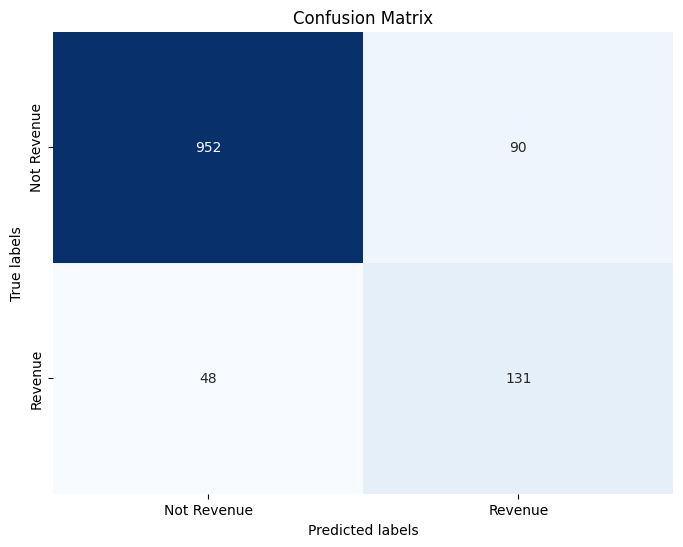

F1-Score của model trong fold 1 : 0.8917492245161196


Số lượng True trong fold 2 : 183
Số lượng False trong fold 2 : 1038


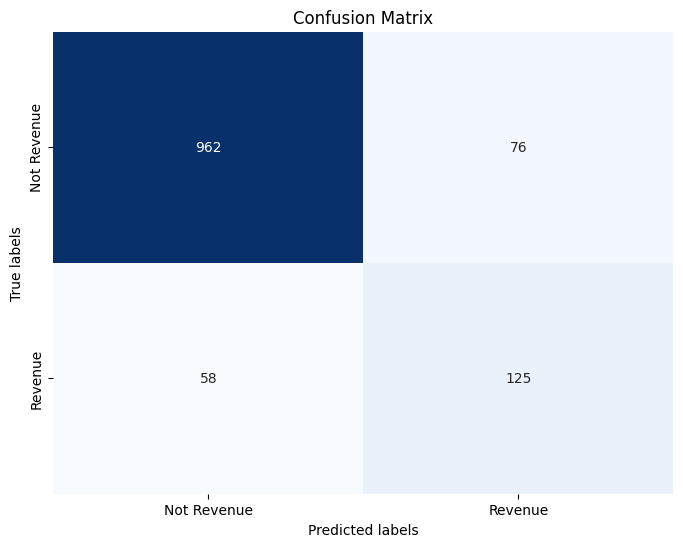

F1-Score của model trong fold 2 : 0.8923461254456152


Số lượng True trong fold 3 : 184
Số lượng False trong fold 3 : 1037


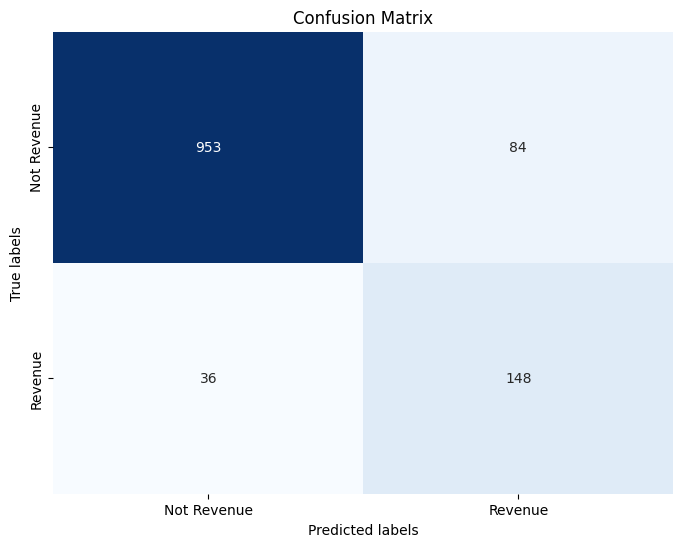

F1-Score của model trong fold 3 : 0.9062256811516438


Số lượng True trong fold 4 : 170
Số lượng False trong fold 4 : 1051


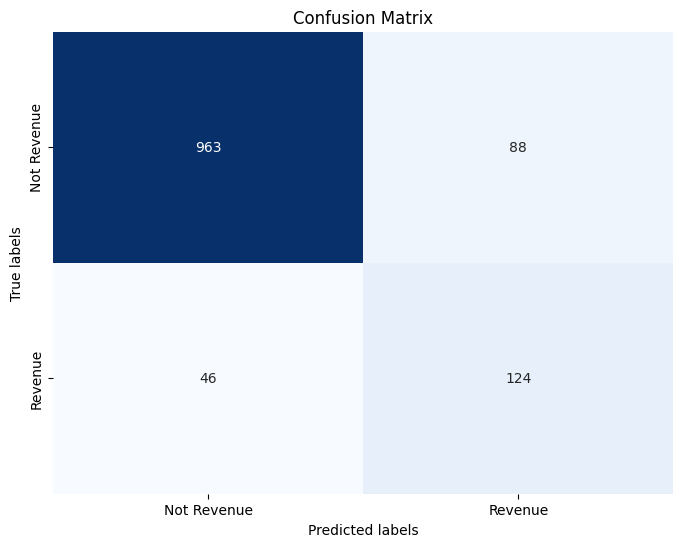

F1-Score của model trong fold 4 : 0.8951682823334326


Số lượng True trong fold 5 : 183
Số lượng False trong fold 5 : 1038


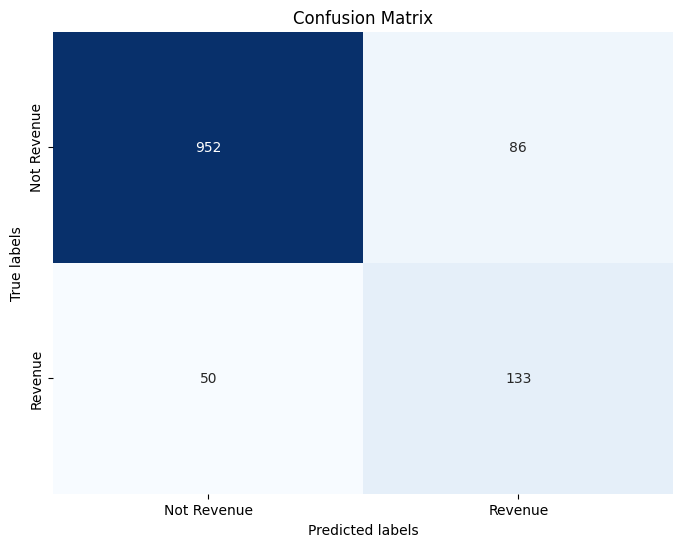

F1-Score của model trong fold 5 : 0.8926204359040181


Số lượng True trong fold 6 : 221
Số lượng False trong fold 6 : 999


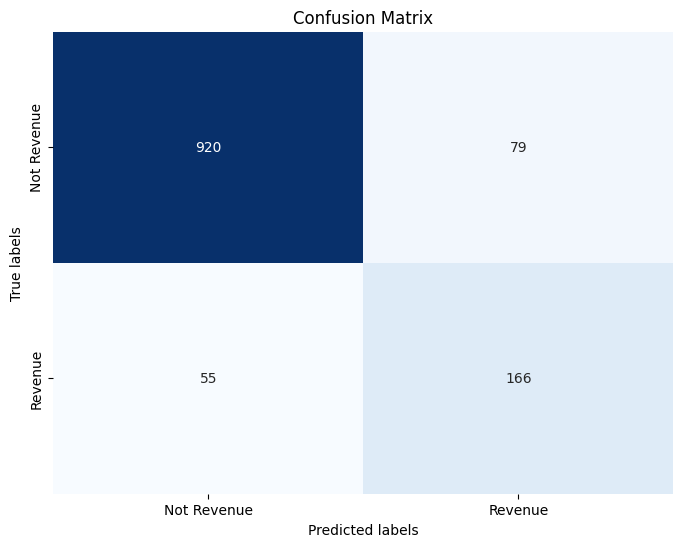

F1-Score của model trong fold 6 : 0.8923246345173529


Số lượng True trong fold 7 : 187
Số lượng False trong fold 7 : 1033


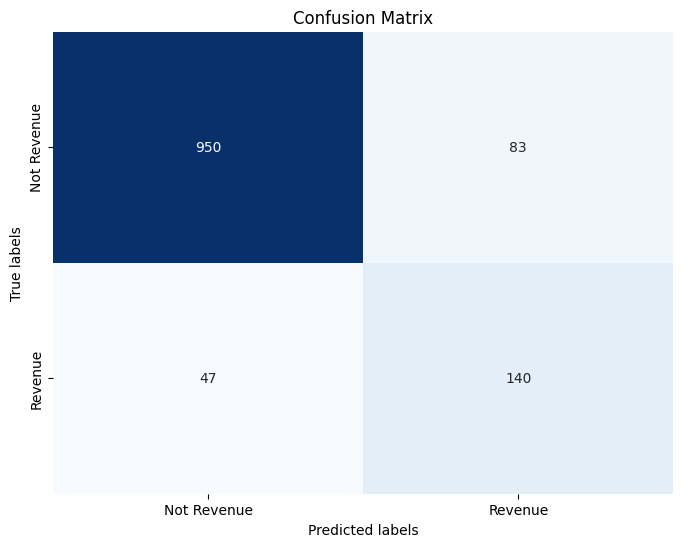

F1-Score của model trong fold 7 : 0.8971759079619384


Số lượng True trong fold 8 : 195
Số lượng False trong fold 8 : 1025


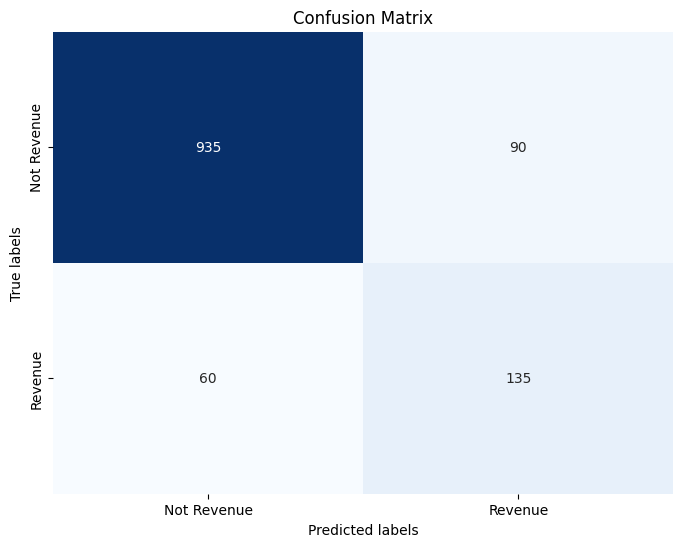

F1-Score của model trong fold 8 : 0.8805272798942657


Số lượng True trong fold 9 : 190
Số lượng False trong fold 9 : 1030


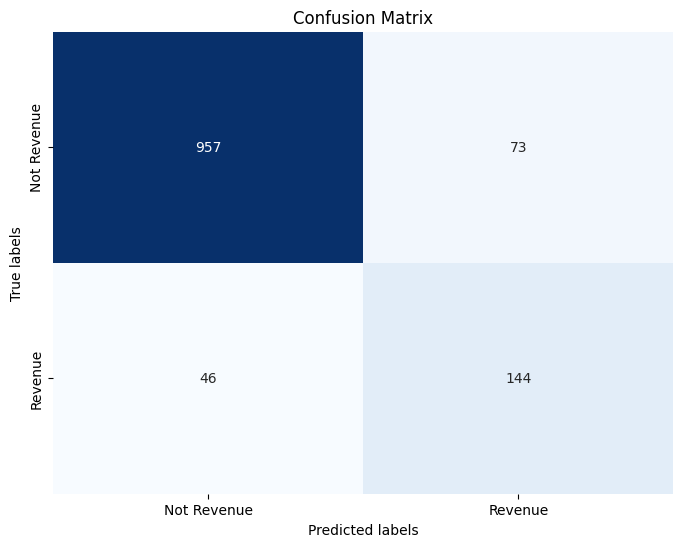

F1-Score của model trong fold 9 : 0.9050466909320417


Số lượng True trong fold 10 : 216
Số lượng False trong fold 10 : 1004


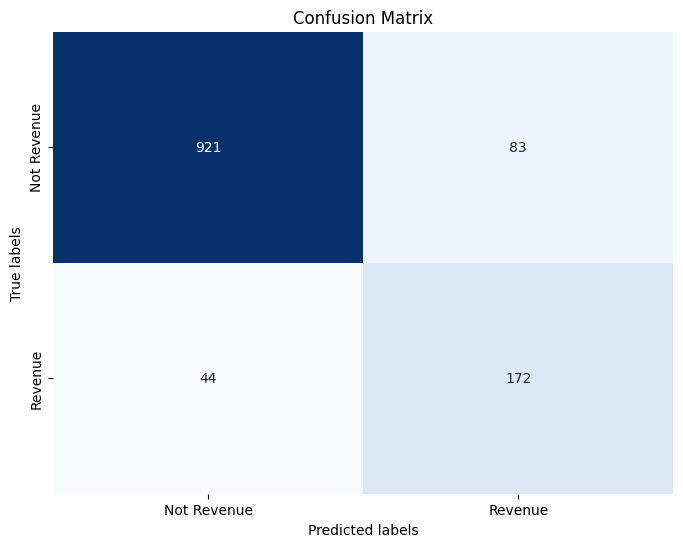

F1-Score của model trong fold 10 : 0.8991805055206488


Accuracy:  0.8916837851264081
Precision:  0.9008106789768041
Recall:  0.8916837851264081
F1_Score:  0.8952364768177077
Average Train Time:  3.91906476020813
Highest F1 score: 0.9062256811516438 from model 2


In [ ]:
#Random Forest
import numpy as np
import statistics
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Số lượng folds
num_folds = 10

# Tạo danh sách để lưu trữ kết quả
avg_acc = []
avg_prec = []
avg_rec = []
avg_f1 = []
train_times = []

# Tạo một KFold object
kf = KFold(n_splits=num_folds, random_state=42, shuffle=True)

# Thực hiện cross-validation
for fold, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = y[train_index], y[test_index]

    # Đếm số lượng giá trị True và False trong mảng NumPy
    num_true = np.sum(Y_test)
    num_false = len(Y_test) - num_true

    print("Số lượng True trong fold", fold+1, ":", num_true)
    print("Số lượng False trong fold", fold+1, ":", num_false)

    # Đo thời gian bắt đầu huấn luyện
    start_train_time = time.time()

    # Tạo và huấn luyện mô hình Random Forest
    model = RandomForestClassifier(n_estimators=200, max_depth=50, min_samples_leaf=4, min_samples_split=4,class_weight='balanced', random_state=42)
    model.fit(X_train, Y_train)

    # Đo thời gian kết thúc huấn luyện và tính toán thời gian huấn luyện
    end_train_time = time.time()
    train_time = end_train_time - start_train_time
    train_times.append(train_time)

    Y_Pred = model.predict(X_test)
    plot_confusion_matrix(Y_test,Y_Pred)

    # Tính toán các chỉ số đánh giá và thêm vào danh sách
    avg_acc.append(accuracy_score(Y_test, Y_Pred))
    avg_prec.append(precision_score(Y_test, Y_Pred, average='weighted'))
    avg_rec.append(recall_score(Y_test, Y_Pred, average='weighted'))
    avg_f1.append(f1_score(Y_test, Y_Pred, average='weighted'))

    print("F1-Score của model trong fold", fold+1, ":", f1_score(Y_test, Y_Pred, average='weighted'))
    print("\n")

# Tính trung bình của các chỉ số
acc = statistics.mean(avg_acc)
prec = statistics.mean(avg_prec)
rec = statistics.mean(avg_rec)
f1 = statistics.mean(avg_f1)
avg_train_time = statistics.mean(train_times)

# In kết quả
print("Accuracy: ", acc)
print("Precision: ", prec)
print("Recall: ", rec)
print("F1_Score: ", f1)
print("Average Train Time: ", avg_train_time)
max_index = avg_f1.index(max(avg_f1))
max_value = max(avg_f1)
print("Highest F1 score:", max_value, "from model", max_index)



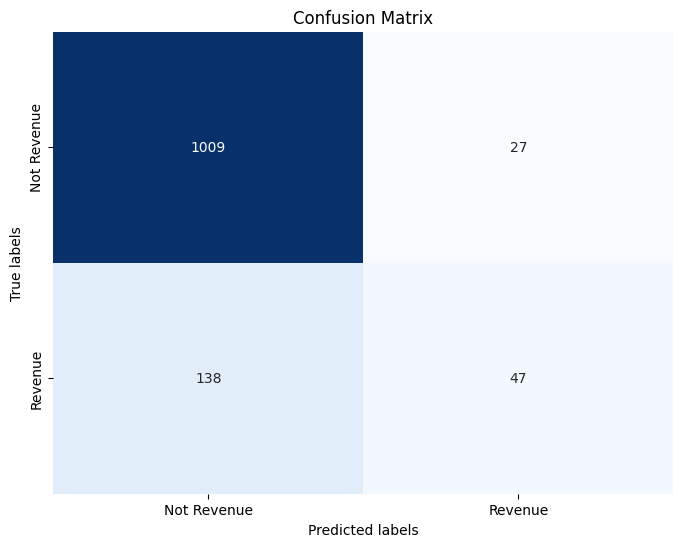

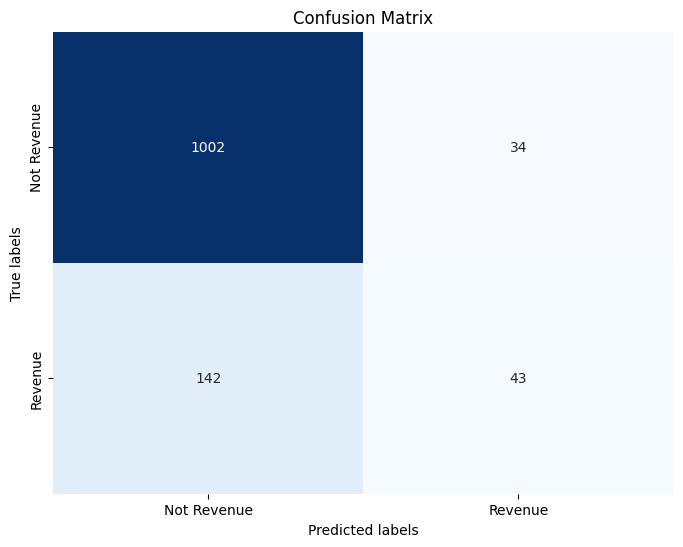

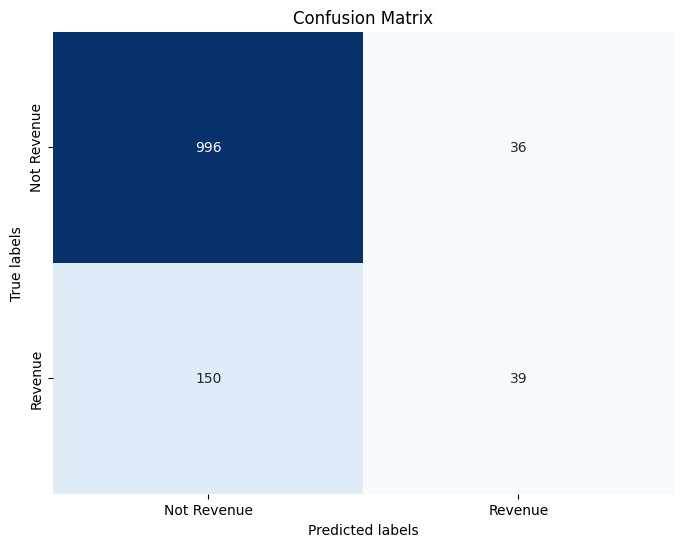

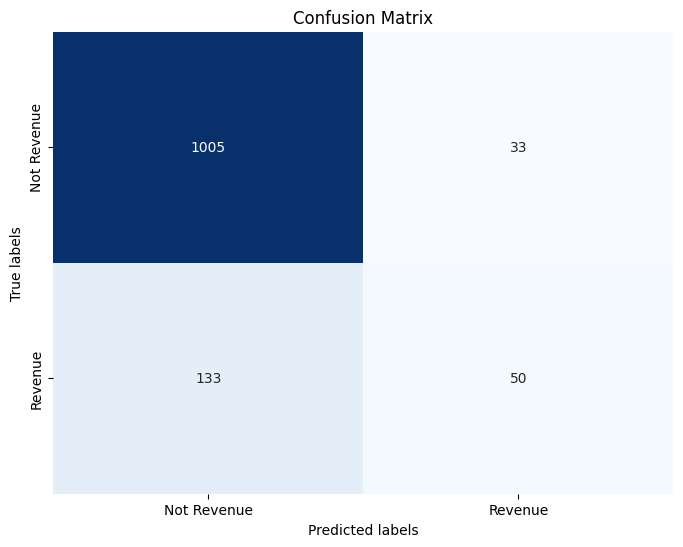

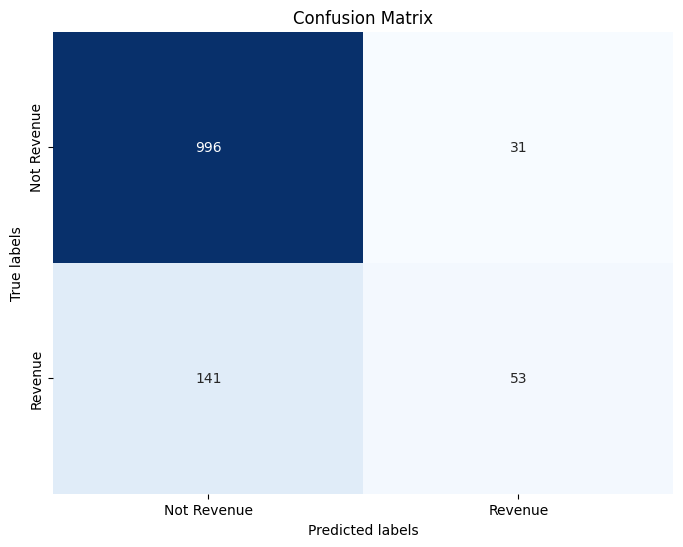

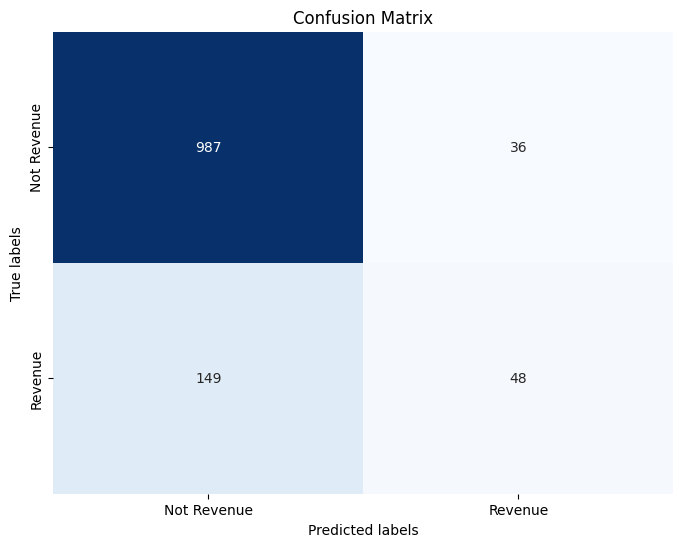

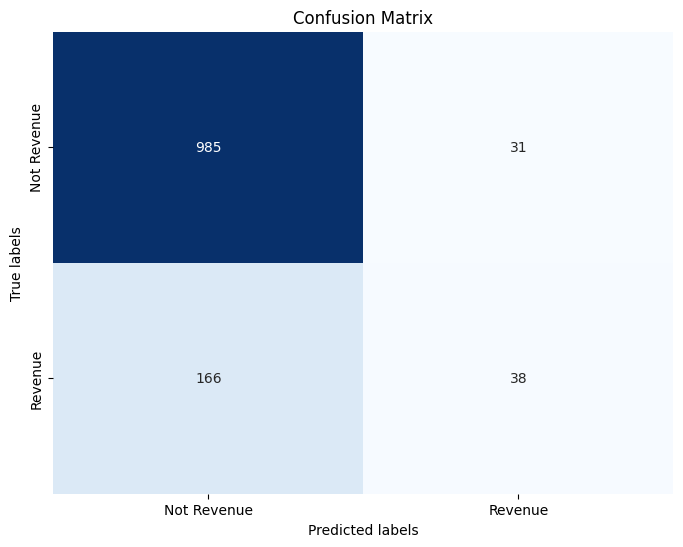

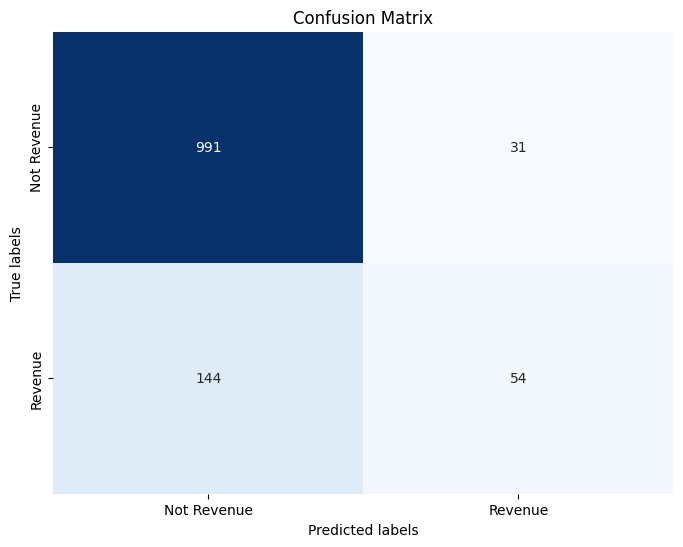

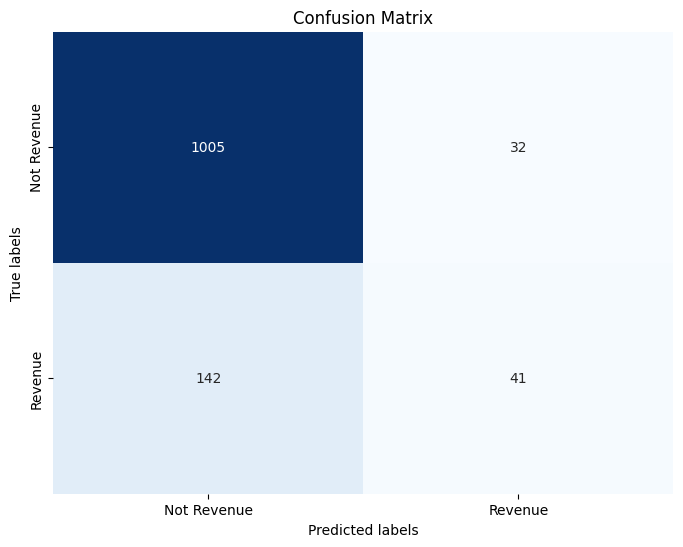

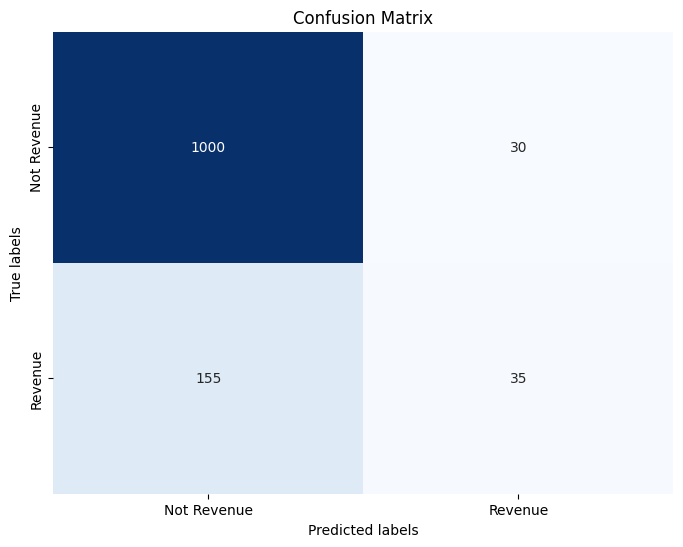

Accuracy:  0.8540744619433144
Precision:  0.82675417820243
Recall:  0.8540744619433144
F1_Score:  0.8267283555958501
Train times:  0.0030827999114990236


In [ ]:
#knn

# Tạo một đối tượng KFold với số fold mong muốn
kf = KFold(n_splits=10, shuffle=True)

avg_acc = []
avg_prec = []
avg_rec = []
avg_f1 = []
train_times = []

# Thực hiện vòng lặp của KFold
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = y[train_index], y[test_index]

    # Đo thời gian bắt đầu huấn luyện
    start_train_time = time.time()

    # Tạo và huấn luyện mô hình KNN
    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(X_train, Y_train)

    # Đo thời gian kết thúc huấn luyện và tính toán thời gian huấn luyện
    end_train_time = time.time()
    train_time = end_train_time - start_train_time
    train_times.append(train_time)

    # Dự đoán trên tập kiểm tra
    Y_Pred = model.predict(X_test)
    plot_confusion_matrix(Y_test,Y_Pred)

    # Tính toán các chỉ số đánh giá và thêm vào danh sách
    avg_acc.append(accuracy_score(Y_test, Y_Pred))
    avg_prec.append(precision_score(Y_test, Y_Pred, average='weighted'))
    avg_rec.append(recall_score(Y_test, Y_Pred, average='weighted'))
    avg_f1.append(f1_score(Y_test, Y_Pred, average='weighted'))

# Tính trung bình của các chỉ số
acc = statistics.mean(avg_acc)
prec = statistics.mean(avg_prec)
rec = statistics.mean(avg_rec)
f1 = statistics.mean(avg_f1)
avg_train_time = statistics.mean(train_times)

# In kết quả
print("Accuracy: ", acc)
print("Precision: ", prec)
print("Recall: ", rec)
print("F1_Score: ", f1)
print("Train times: ", avg_train_time)




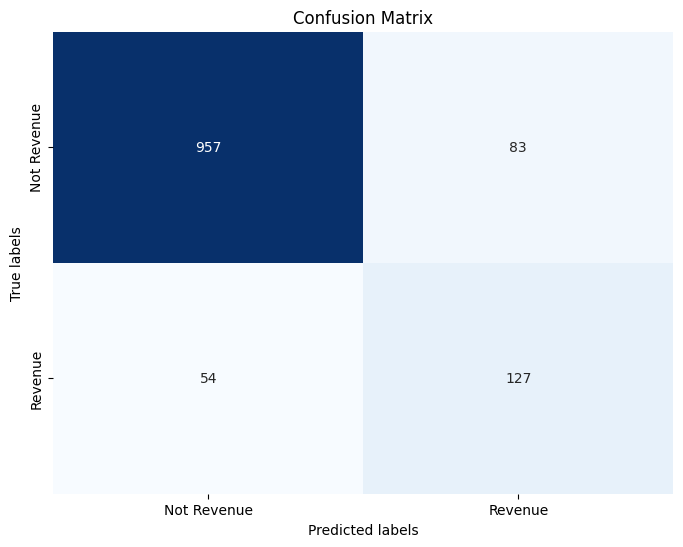

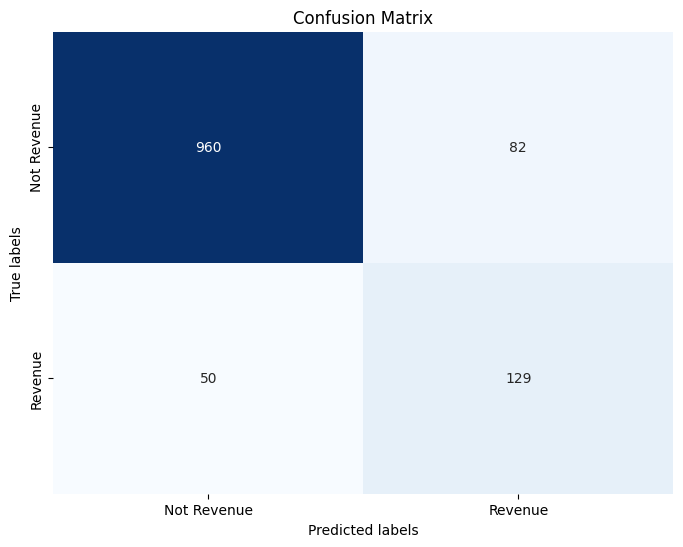

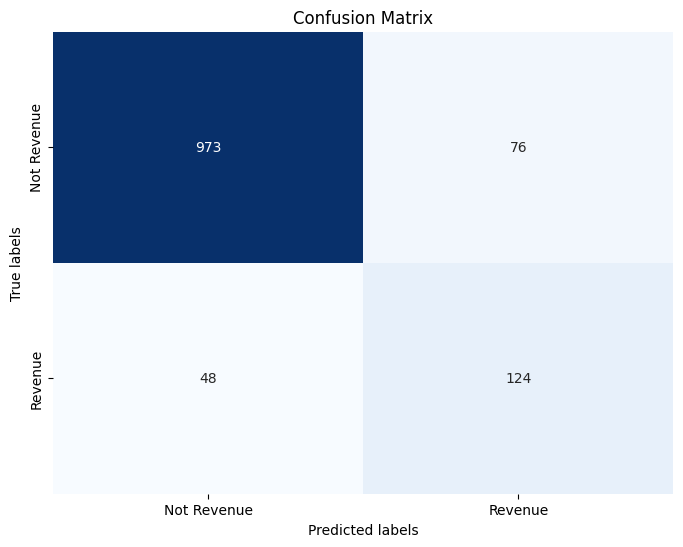

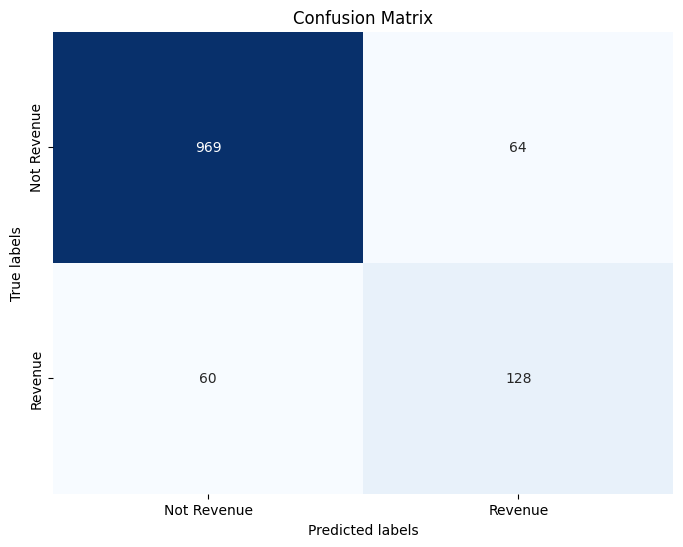

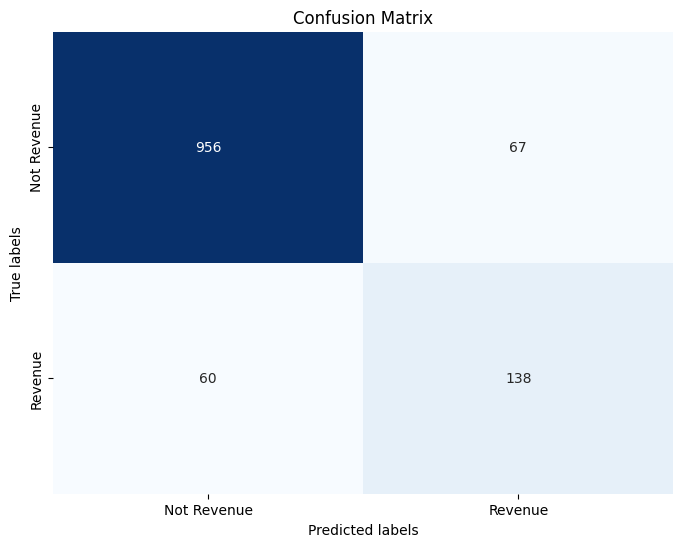

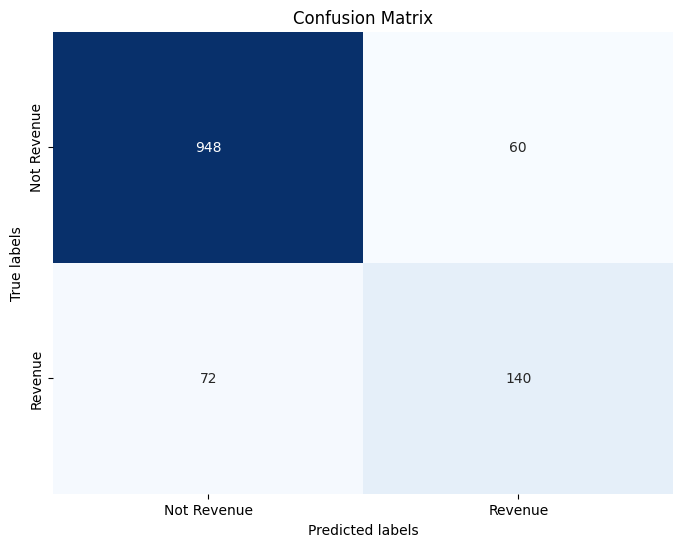

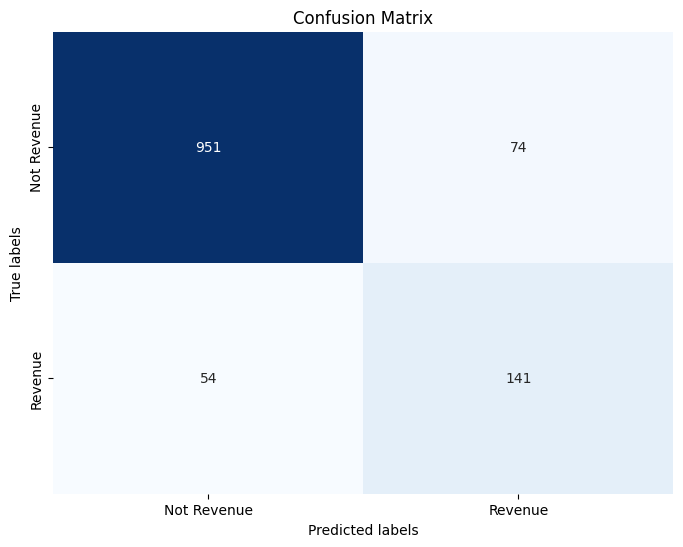

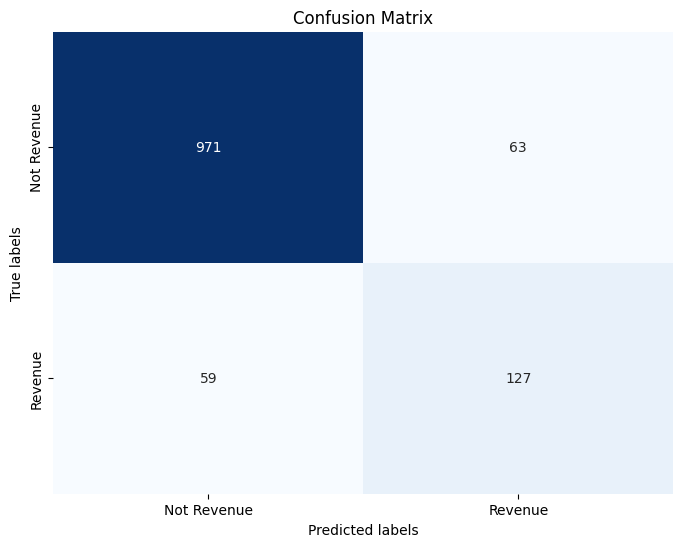

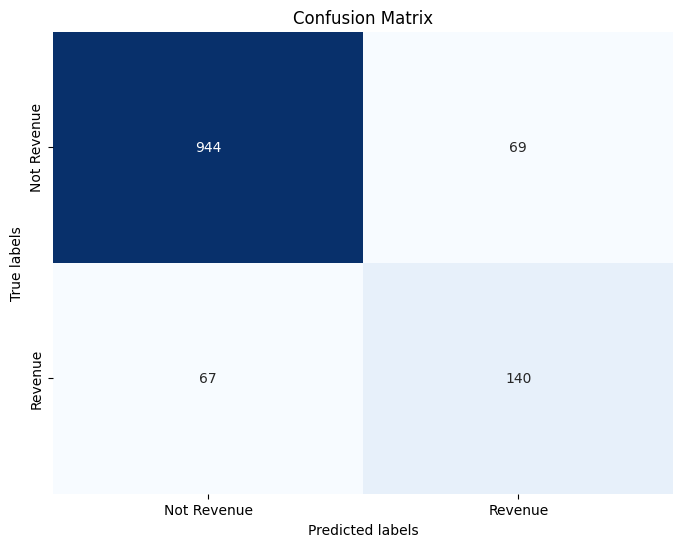

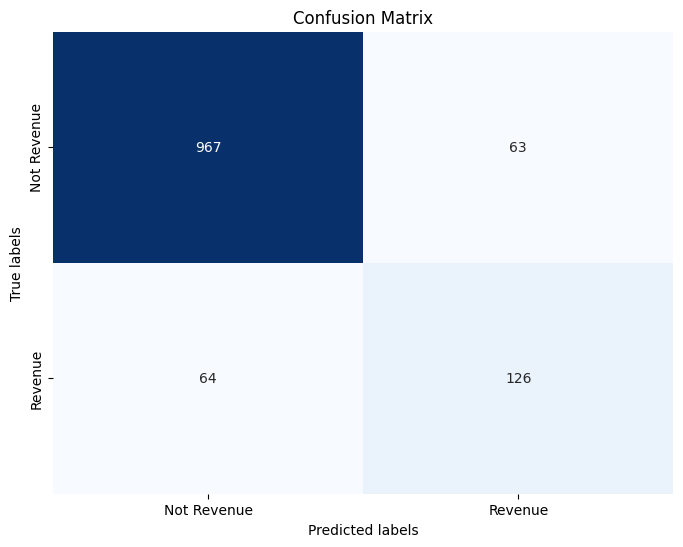

Accuracy:  0.8943874947973309
Precision:  0.8974568156853383
Recall:  0.8943874947973309
F1_Score:  0.895645329389822
Train times:  11.228338313102721


In [ ]:
#Bangging

# Tạo một đối tượng KFold với số fold mong muốn
kf = KFold(n_splits=10, shuffle=True)

avg_acc = []
avg_prec = []
avg_rec = []
avg_f1 = []
train_times = []

# Thực hiện vòng lặp của KFold
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = y[train_index], y[test_index]

    # Đo thời gian bắt đầu huấn luyện
    start_train_time = time.time()

    # Tạo và huấn luyện mô hình Bagging
    model = BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=50, criterion='entropy',
                                                               min_samples_split=4, min_samples_leaf=4, class_weight='balanced'),
                              n_estimators=200,
                              random_state=42)
    model.fit(X_train, Y_train)

    # Đo thời gian kết thúc huấn luyện và tính toán thời gian huấn luyện
    end_train_time = time.time()
    train_time = end_train_time - start_train_time
    train_times.append(train_time)

    # Dự đoán trên tập kiểm tra
    Y_Pred = model.predict(X_test)
    plot_confusion_matrix(Y_test,Y_Pred)

    # Tính toán các chỉ số đánh giá và thêm vào danh sách
    avg_acc.append(accuracy_score(Y_test, Y_Pred))
    avg_prec.append(precision_score(Y_test, Y_Pred, average='weighted'))
    avg_rec.append(recall_score(Y_test, Y_Pred, average='weighted'))
    avg_f1.append(f1_score(Y_test, Y_Pred, average='weighted'))

# Tính trung bình của các chỉ số
acc = statistics.mean(avg_acc)
prec = statistics.mean(avg_prec)
rec = statistics.mean(avg_rec)
f1 = statistics.mean(avg_f1)
avg_train_time = statistics.mean(train_times)

# In kết quả
print("Accuracy: ", acc)
print("Precision: ", prec)
print("Recall: ", rec)
print("F1_Score: ", f1)
print("Train times: ", avg_train_time)



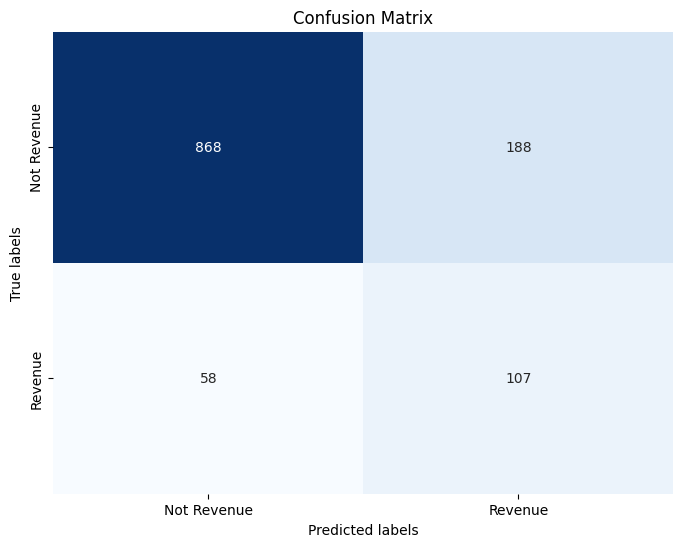

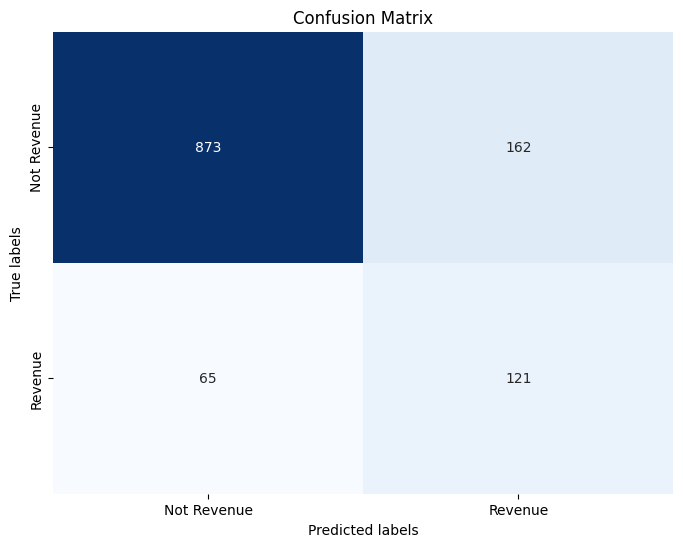

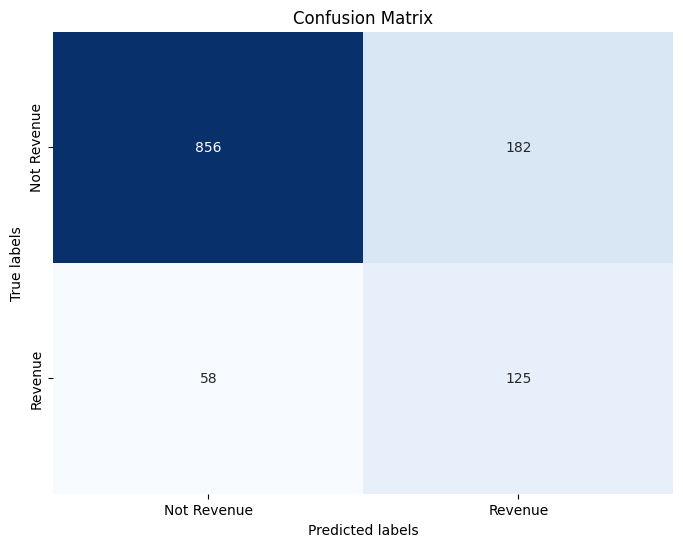

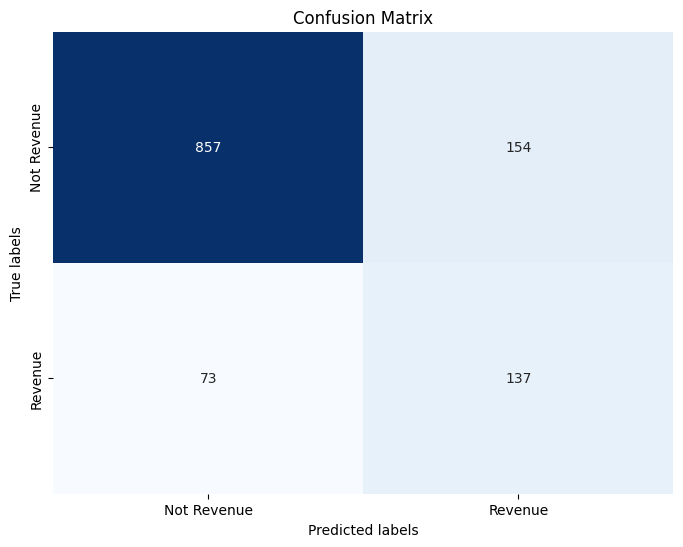

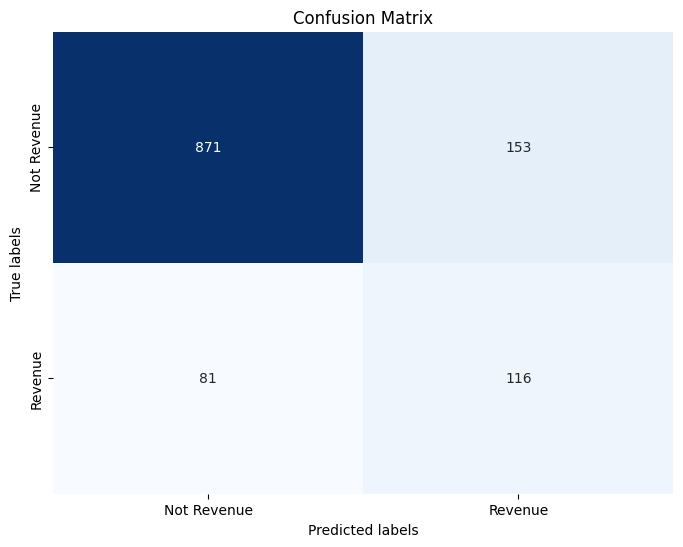

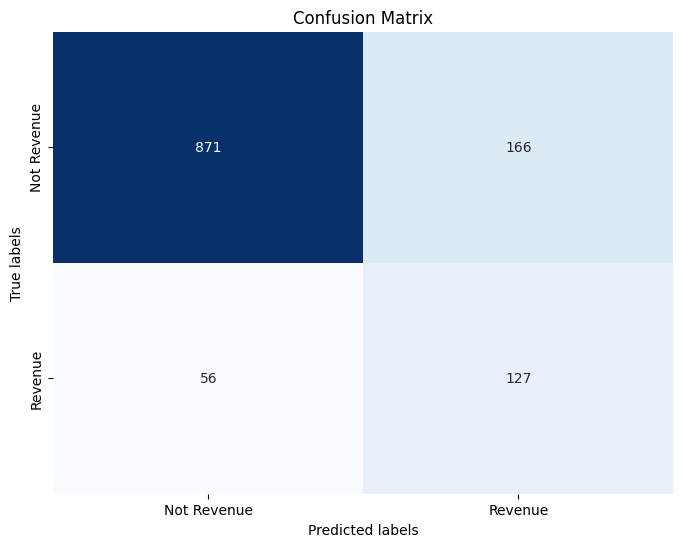

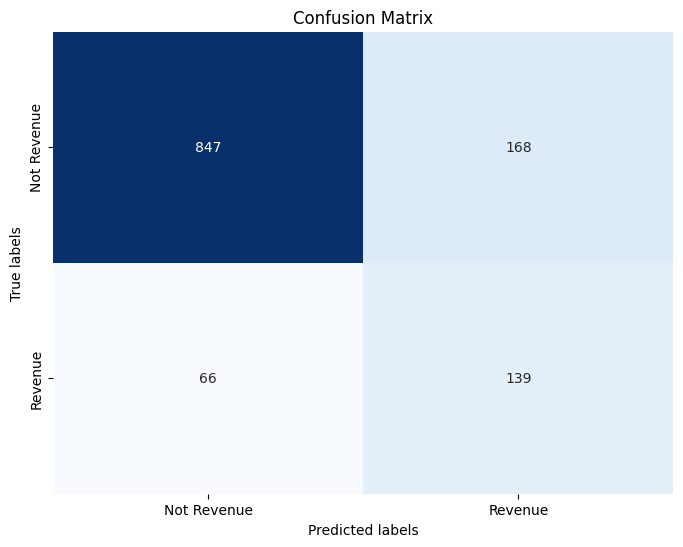

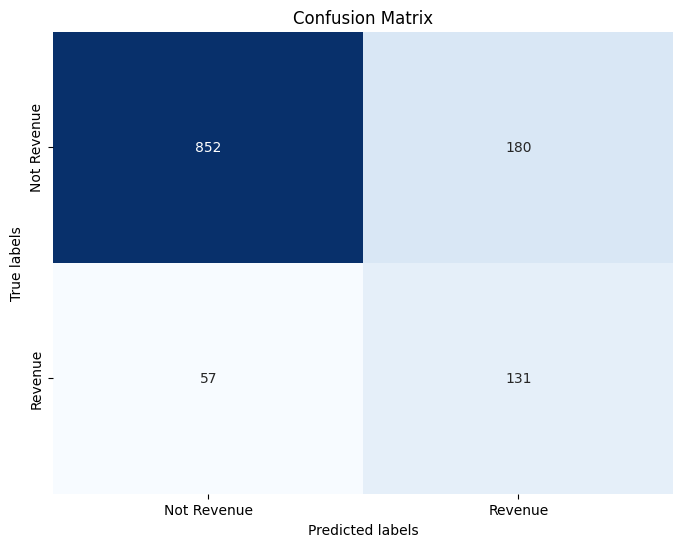

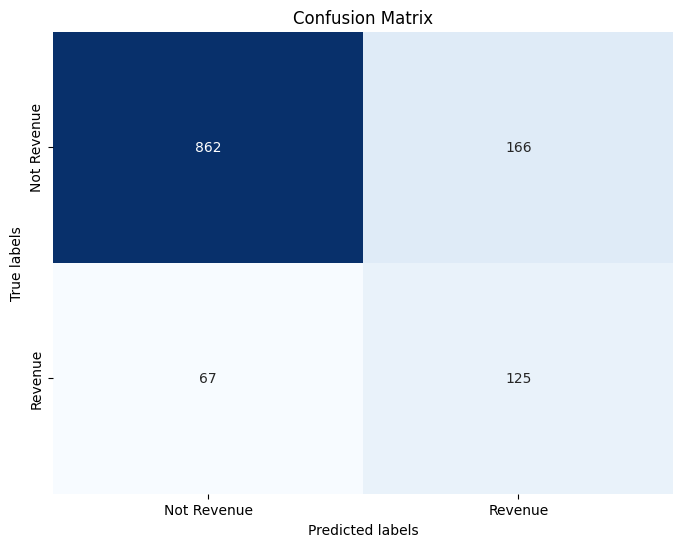

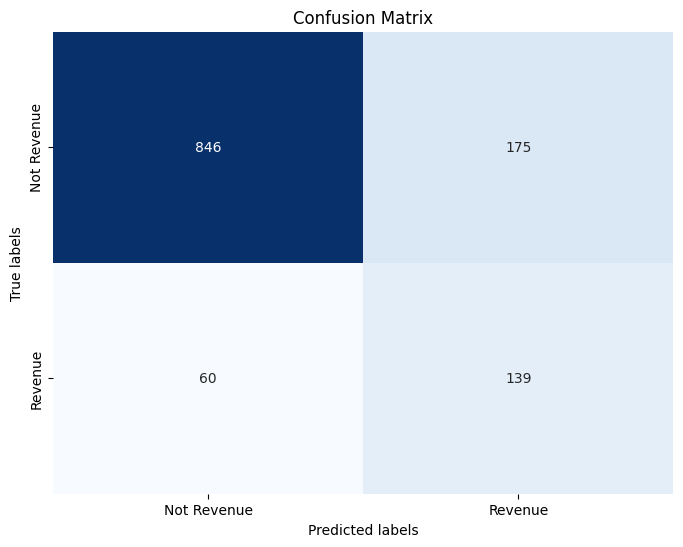

Accuracy:  0.8086853694230743
Precision:  0.8524296292269571
Recall:  0.8086853694230743
F1_Score:  0.8242795452142937
Train times:  0.00811924934387207


In [ ]:
#Bayes
import numpy as np
import statistics
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time

# Tạo một đối tượng KFold với số fold mong muốn
kf = KFold(n_splits=10, shuffle=True)

avg_acc = []
avg_prec = []
avg_rec = []
avg_f1 = []
train_times = []

# Thực hiện vòng lặp của KFold
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = y[train_index], y[test_index]

    # Đo thời gian bắt đầu huấn luyện
    start_train_time = time.time()

    # Tạo và huấn luyện mô hình Naive Bayes
    model = GaussianNB()
    model.fit(X_train, Y_train)

    # Đo thời gian kết thúc huấn luyện và tính toán thời gian huấn luyện
    end_train_time = time.time()
    train_time = end_train_time - start_train_time
    train_times.append(train_time)

    # Dự đoán trên tập kiểm tra
    Y_Pred = model.predict(X_test)
    plot_confusion_matrix(Y_test,Y_Pred)

    # Tính toán các chỉ số đánh giá và thêm vào danh sách
    avg_acc.append(accuracy_score(Y_test, Y_Pred))
    avg_prec.append(precision_score(Y_test, Y_Pred, average='weighted'))
    avg_rec.append(recall_score(Y_test, Y_Pred, average='weighted'))
    avg_f1.append(f1_score(Y_test, Y_Pred, average='weighted'))

# Tính trung bình của các chỉ số
acc = statistics.mean(avg_acc)
prec = statistics.mean(avg_prec)
rec = statistics.mean(avg_rec)
f1 = statistics.mean(avg_f1)
avg_train_time = statistics.mean(train_times)

# In kết quả
print("Accuracy: ", acc)
print("Precision: ", prec)
print("Recall: ", rec)
print("F1_Score: ", f1)
print("Train times: ", avg_train_time)



Nhận xét: các thuật toán tìm kiếm cây như Bagging , Random Forest cho hiệu quả tốt khi thực hiện trên các tập dữ liệu mất cân bằng